In [3]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F   #Most of the times needs parameters passed to the function

In [7]:
train = datasets.MNIST("", train  = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train  = False, transform = transforms.Compose([transforms.ToTensor()]))

In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

- self.fc1 = nn.Linear(28*28, 64) 
  - input here is the image, but we cannot pass the image directly so we need to pass the flattened image
  - output - we are building 3 hidden layers with 64 neurons each
  - Linear - fully connected - flat and linear
  - Conv - for Convolutional neural network
  
  
- self.fc2 = nn.Linear(64, 64)
  - input 64 from previous layer,
  - output can be variable but is set to 64
  
  
- self.fc4 = nn.Linear(64, 10)
  - 10 as the output as we have 10 digits to be classified 
  
  
A simple neural network is the one in which the data passes in one direction - feed forward 
  

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) 
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):  # x -input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
                                        
net = Net()
print(net)        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
# X = torch.rand((28,28))
# X = X.view(-1, 28*28) # -1/1 specifies that the input is of an unknown shape

In [21]:
# output = net(X)

In [22]:
# output

- Loss - measure of how wrong the model is


- Optimizer - go through and adjust the weights based on the loss so as to lessen the loss over time. This time depends upon the learning rate.


- Decaying learning rate


- epoch - whole pass through the data once


- If the data is a scalar value, use nll_loss
- If the data is a one hot vector use mse

In [26]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001) #1e-3

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featureset and labels
        X, y = data
#         print(X[0])
#         print(y[0])
#         break
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0091, grad_fn=<NllLossBackward>)
tensor(0.1653, grad_fn=<NllLossBackward>)
tensor(0.2067, grad_fn=<NllLossBackward>)


In [27]:
correct = 0
total = 0

with torch.no_grad():   #We dn't want to calculate the gradients here, 
    for data in testset: #We just want to check how good the network is
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))
      
        
    

Accuracy:  0.968


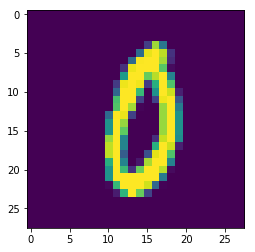

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [31]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(0)
